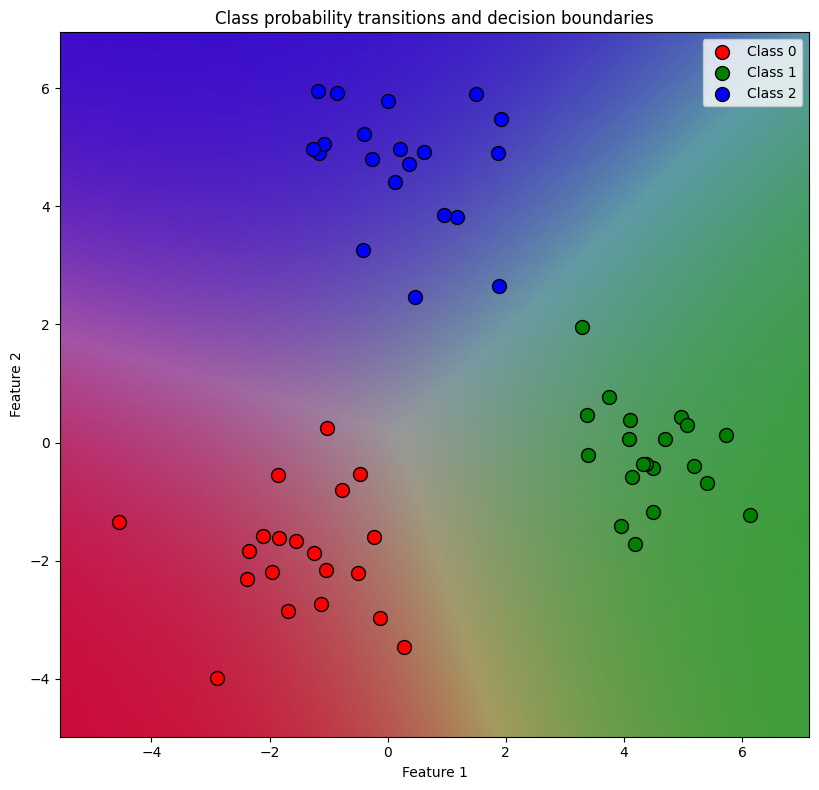

In [ ]:
# CS771 (Autumn 2023)
# softmax classification model (with L2 regularization on weights) learned using gradient descent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Generate synthetic data with three classes
np.random.seed(0)
X = np.vstack([np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [5, 0], np.random.randn(20, 2) + [0, 4]])
y = np.hstack([np.zeros(20), np.ones(20), 2 * np.ones(20)])

# Add a column of ones for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Define softmax regression functions
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def softmax_regression(X, y, eta, num_iterations, lambda_reg, num_classes):
    N, D = X.shape
    W = np.zeros((D, num_classes))
    for _ in range(num_iterations):
        scores = np.dot(X, W)
        probabilities = softmax(scores)
        gradient = (1/N) * np.dot(X.T, (probabilities - np.eye(num_classes)[y.astype(int)])) + lambda_reg * W
        W -= eta * gradient
    return W

# Train softmax regression with L2 regularization
eta = 0.01
num_iterations = 1000
lambda_reg = 1.0
num_classes = 3

W = softmax_regression(X, y, eta, num_iterations, lambda_reg, num_classes)


# Define a meshgrid for the decision boundary (you've already done this)
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Create a feature matrix for the decision boundary (flattened meshgrid)
grid_features = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]

# Calculate the softmax probabilities for each point in the grid
grid_probabilities = softmax(np.dot(grid_features, W))

# Reshape the probabilities to match the shape of the meshgrid
grid_probabilities = grid_probabilities.reshape(xx.shape[0], xx.shape[1], num_classes)

# Create a composite heatmap showing probabilities and transitions
plt.figure(figsize=(10, 8))

# Create a colormap for the composite heatmap
n_bins = 100
composite_cmap = LinearSegmentedColormap.from_list('composite_colormap', ['white', 'purple'], N=n_bins)


# Find the most likely class
max_probabilities = np.max(grid_probabilities, axis=2)

plt.imshow(max_probabilities, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap=composite_cmap, alpha=0.9)
plt.imshow(grid_probabilities, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap=composite_cmap, alpha=0.6)

# Plot the training examples as well
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], label='Class 0', c='r', marker='o', edgecolor='k', s=100)
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], label='Class 1', c='g', marker='o', edgecolor='k', s=100)
plt.scatter(X[y == 2][:, 1], X[y == 2][:, 2], label='Class 2', c='b', marker='o', edgecolor='k', s=100)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Class probability transitions and decision boundaries')

# Show the legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()